# Data Visualisation

## Import Required Modules

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [17]:
demand_df = pd.read_csv('demand.csv', parse_dates=['Date'])
demand_df.head()

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-03 21:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-03 21:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03 22:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-03 22:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-03 22:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
price_df = pd.read_csv('price.csv', parse_dates=['Date'])
price_df.head()

,Date,TOTALDEMAND,RRP
0,2020-10-01 00:30:00,4670.40,39.09
1,2020-10-01 01:00:00,4513.84,38.39
2,2020-10-01 01:30:00,4329.71,36.46
3,2020-10-01 02:00:00,4146.21,35.79
4,2020-10-01 02:30:00,4003.90,33.65


In [19]:
weather_df = pd.read_csv('weather.csv', parse_dates=['Date'])
weather_df.head()

,Date,olympic_max_temp,moorabbin_max_temp,olympic_min_temp,moorabbin_min_temp,olympic_rain,oakleigh_rain,moorabbin_rain,olympic_solar,oakleigh_solar,moorabbin_solar
0,2013-01-01,NaN,22.8,NaN,13.3,NaN,0.0,0.0,31.1,30.5,29.4
1,2013-01-02,NaN,20.5,NaN,12.6,NaN,0.0,0.0,31.9,32.8,33.0
2,2013-01-03,NaN,36.5,NaN,12.0,NaN,0.0,0.0,32.8,32.2,31.9
3,2013-01-04,NaN,41.5,NaN,18.6,NaN,0.0,0.0,33.5,33.6,33.6
4,2013-01-05,NaN,26.2,NaN,18.8,NaN,0.0,0.0,30.5,31.4,29.6


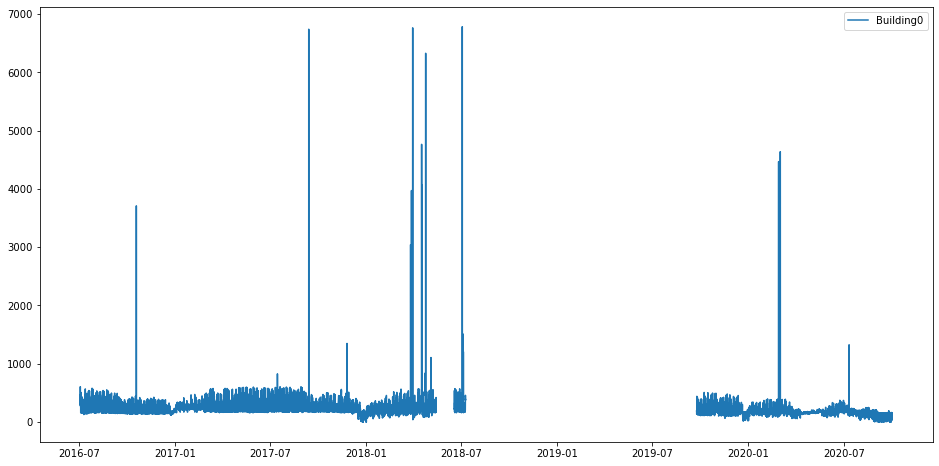

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
for col in demand_df[['Building0']].columns:
    ax.plot(demand_df['Date'], demand_df[col], label = col)
ax.legend()

## Smooth Peaks

In [21]:
from scipy.signal import argrelextrema
from scipy.signal import savgol_filter, find_peaks, find_peaks_cwt

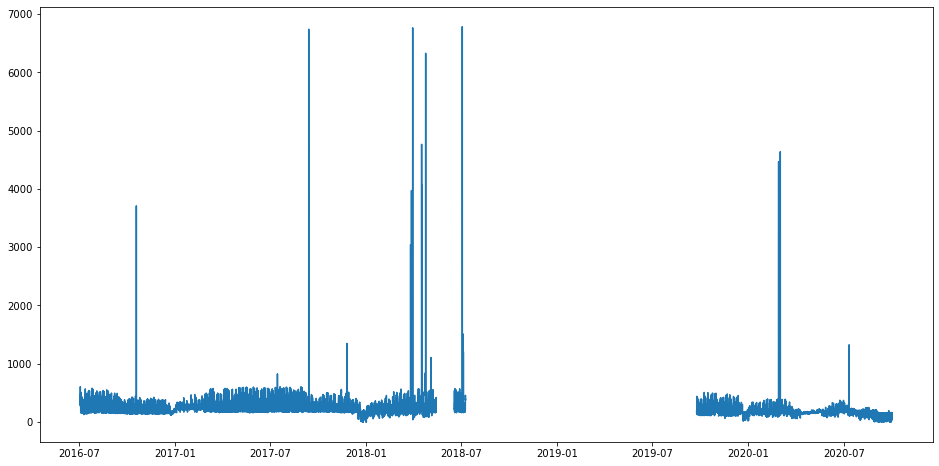

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(demand_df['Date'], demand_df['Building0'], label='Original Height')

In [23]:
#apply a Savitzky-Golay filter
smooth = savgol_filter(demand_df['Building0'].values, window_length = 351, polyorder = 5)

#find the maximums
peaks_idx_max, _ = find_peaks(smooth, prominence = 0.01)

#reciprocal, so mins will become max
smooth_rec = 1/smooth

#find the mins now
peaks_idx_mins, _ = find_peaks(smooth_rec, prominence = 0.01)

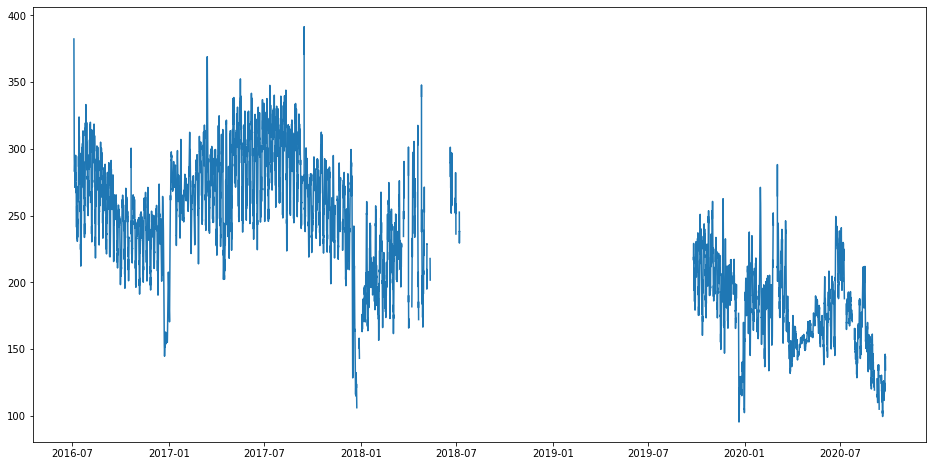

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(demand_df['Date'], smooth, label='smoothed')